In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

## Train Dataset

In [2]:
dataset = MNIST(root = '.' , download = True , transform = ToTensor())

In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

## Random Plots

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, '5')

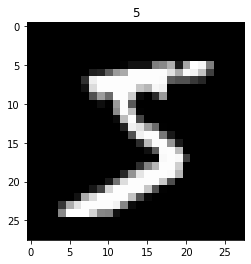

In [6]:
plt.imshow(dataset[0][0][0,:,:] , cmap = 'gray')
plt.title(dataset[0][1])

Text(0.5, 1.0, '9')

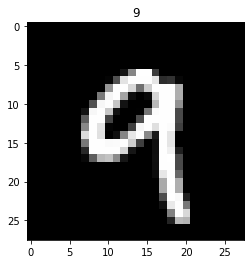

In [7]:
plt.imshow(dataset[110][0][0,:,:] , cmap = 'gray')
plt.title(dataset[110][1])

In [8]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader

In [9]:
batch_size = 100

train_dl = DataLoader(dataset , batch_size , sampler = SubsetRandomSampler(np.random.permutation(len(dataset))))

In [10]:
for image,label in train_dl:
    print(image.shape)
    print(label)
    break

torch.Size([100, 1, 28, 28])
tensor([3, 5, 0, 1, 6, 0, 6, 4, 6, 5, 4, 0, 7, 7, 7, 1, 4, 9, 0, 7, 1, 7, 1, 6,
        1, 0, 8, 6, 4, 6, 0, 8, 2, 2, 7, 3, 5, 2, 4, 0, 0, 5, 3, 1, 1, 2, 2, 1,
        4, 1, 6, 1, 8, 5, 9, 1, 1, 0, 6, 1, 5, 4, 7, 7, 2, 9, 0, 4, 9, 3, 5, 6,
        3, 4, 8, 2, 3, 3, 6, 2, 9, 1, 7, 2, 2, 2, 9, 9, 0, 4, 3, 3, 3, 2, 0, 0,
        4, 1, 8, 2])


In [11]:
import torch.nn as nn
import torch.nn.functional as F

## Model

In [12]:
class DigitClassification(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,8,3,1,2) 
        self.pool1 = nn.MaxPool2d(2,2)
        
        self.conv2 = nn.Conv2d(8,16,3,1,1)
        self.pool2 = nn.MaxPool2d(2,2)
        
        self.conv3 = nn.Conv2d(16,32,3,1,2)
        self.pool3 = nn.MaxPool2d(2,2) 
        
        self.conv4 = nn.Conv2d(32,64,3,1,1)
        self.pool4 = nn.MaxPool2d(2,2)
        
        self.flat = nn.Flatten()
        
        self.linear1 = nn.Linear(256 , 32)
        self.linear2 = nn.Linear(32,10)
    
    def forward(self , batch):
        out = self.pool1(F.relu(self.conv1(batch)))
        out = self.pool2(F.relu(self.conv2(out)))
        out = self.pool3(F.relu(self.conv3(out)))
        out = self.pool4(F.relu(self.conv4(out)))
        
        out = self.flat(out)
        
        out = self.linear1(out)
        out = F.relu(out)
        out = self.linear2(out)
        
        return out
        
        

In [13]:
model = DigitClassification()

In [14]:
list(model.parameters())

[Parameter containing:
 tensor([[[[ 2.4067e-01, -1.7103e-02, -5.2850e-02],
           [-6.3094e-02,  4.7007e-02,  2.2296e-01],
           [-2.4726e-01,  8.7985e-02,  2.3886e-02]]],
 
 
         [[[ 1.2350e-04, -1.0447e-01, -1.1183e-01],
           [-1.1370e-01,  1.4180e-01,  1.1177e-01],
           [ 3.3063e-01, -1.7588e-01, -2.8195e-02]]],
 
 
         [[[ 1.5846e-01, -1.8236e-01, -1.0803e-01],
           [-1.9248e-02,  2.6913e-01, -1.8813e-01],
           [ 3.3247e-01, -2.6526e-02,  8.5319e-02]]],
 
 
         [[[-2.7901e-01, -4.8437e-02, -1.7249e-02],
           [ 2.7332e-01,  1.0875e-01,  1.9451e-03],
           [ 3.4482e-02,  9.9327e-02,  1.3507e-01]]],
 
 
         [[[-1.2544e-01,  1.1096e-01,  3.1899e-01],
           [ 3.2592e-01, -3.1069e-01,  1.9772e-01],
           [ 1.3540e-01,  2.9605e-01,  9.5258e-02]]],
 
 
         [[[-1.7430e-02, -1.1395e-02,  1.9853e-01],
           [ 3.1622e-01, -5.3895e-02,  2.3553e-01],
           [-1.1795e-01,  2.6592e-01, -1.8392e-01]]],
 
 
     

In [15]:
for image,label in train_dl:
    pred = model(image)
    loss = F.cross_entropy(pred , label)
    print('Initial loss : ' , loss.item())
    break

Initial loss :  2.321671724319458


## Sending Data To GPU In Batches

In [16]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda:0')
    else:
        return torch.device('cpu')

In [17]:
device = get_default_device()
device

device(type='cuda', index=0)

In [18]:
model = DigitClassification().to(device) # passes model to GPU 

In [19]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [20]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [21]:
train_dl = DeviceDataLoader(train_dl, device)

In [22]:
opt = torch.optim.SGD(model.parameters() , lr = 0.01)

## Training

In [23]:
iteration = []
loss_set = []

for i in range(24):
    for image,label in train_dl:
        pred = model(image)
        loss = F.cross_entropy(pred , label)
        loss.backward()
        with torch.no_grad():
            opt.step()
            opt.zero_grad()
        
    iteration.append(i)
    loss_set.append(float("{:.2f}".format(loss)))

    print(f'Iteration {i} , Loss : {loss}')

Iteration 0 , Loss : 2.2961463928222656
Iteration 1 , Loss : 2.2979562282562256
Iteration 2 , Loss : 2.2807695865631104
Iteration 3 , Loss : 1.5430907011032104
Iteration 4 , Loss : 0.4101593494415283
Iteration 5 , Loss : 0.17360679805278778
Iteration 6 , Loss : 0.2147565633058548
Iteration 7 , Loss : 0.19921329617500305
Iteration 8 , Loss : 0.315003365278244
Iteration 9 , Loss : 0.19939474761486053
Iteration 10 , Loss : 0.08917412906885147
Iteration 11 , Loss : 0.12175825238227844
Iteration 12 , Loss : 0.056401580572128296
Iteration 13 , Loss : 0.0675685703754425
Iteration 14 , Loss : 0.10517005622386932
Iteration 15 , Loss : 0.13912509381771088
Iteration 16 , Loss : 0.030759291723370552
Iteration 17 , Loss : 0.07281431555747986
Iteration 18 , Loss : 0.1338278353214264
Iteration 19 , Loss : 0.030923137441277504
Iteration 20 , Loss : 0.03832457587122917
Iteration 21 , Loss : 0.06417449563741684
Iteration 22 , Loss : 0.031947068870067596
Iteration 23 , Loss : 0.050020355731248856


## Plot For Loss Decrement

Text(0.5, 0, 'Iteration')

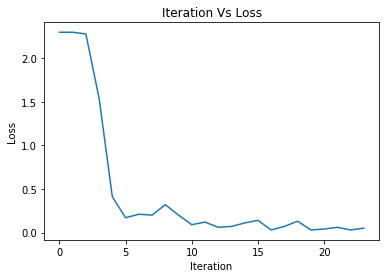

In [24]:
plt.plot(iteration , loss_set)
plt.title('Iteration Vs Loss')
plt.ylabel('Loss')
plt.xlabel('Iteration')

## Getting Test Data

In [25]:
testset = MNIST(root = '.' , train = False , transform = ToTensor())

In [26]:
testset

Dataset MNIST
    Number of datapoints: 10000
    Root location: .
    Split: Test
    StandardTransform
Transform: ToTensor()

In [27]:
batch_size = 100
test_dl = DataLoader(testset , batch_size , sampler = SubsetRandomSampler(np.random.permutation(len(testset))))

In [28]:
test_dl = DeviceDataLoader(test_dl, device) # passes data to GPU

## Accuracy on Test Set

In [29]:
correct = 0
total = 0
for image,label in test_dl:
    pred = model(image)
    for i in range(len(pred)):
        _ , index = torch.max(F.softmax(pred[i]), dim = 0)
        if index.item() == label[i].item():
            correct += 1
        total += 1

/home/aryanshridhar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [30]:
print(f'Accuracy is {round((correct/total)*100)}%')

Accuracy is 98%
